In [1]:
### fix how M values is taken in
### Switch to Jupyter Notebook
### Import Data
### Make a special data file with only 10 events or so
### Plot the raw signals from those 10 events
### Plot resulting Trapezoids
# figure out calibration
### Plot the full, calibrated energy spectra for Co, Cs, Am (to check for re-takes)
# Fit peaks and get FWHM Values
# Plot FWHM vs gap time
# Plot FWHM vs peak time
# Set optimal peak and gap times and save spectrum
# Make electronic noise plot
# calculate FANO factor
# Write text
# Write TEST functions
# baseline correction 99/ 799
# BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 =comuln, 1 = row
# REDO DATA Cs = low stats, Co maybe okay, Am/ Co peaks?/ pulser?

#BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 = comuln, 1 = row, reshape?
#def fast_baseline_correction(data):


In [20]:
%run lab1_analysis_functions.py

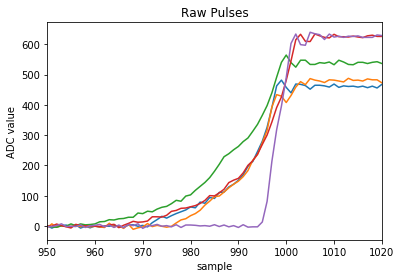

('M ', 4441.878450181689)


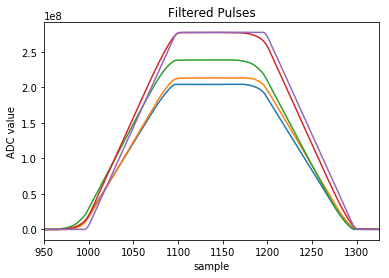

In [13]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
x_values = np.linspace(0, nsamples, nsamples)
tenevents = fast_baseline_correction(tenevents)
for event in tenevents[0:5]:
    plt.plot(event)
plt.xlim([950, 1020])
plt.title('Raw Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_rawdata.pdf')
plt.show()

M = find_M_value(tenevents)
print('M ', M)

k = 100 
m = 100 
M = 4400

for event in tenevents[0:5]:
    event = fast_trapezoidal_filter(event, k, m, M=4400)
    plt.plot(x_values, event)
plt.xlim([950, 1325])
plt.title('Filtered Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_filtered.pdf')
plt.show()

In [14]:
filename = 'data/Cs_pulser_real.h5'
raw_data = import_data(filename)

In [27]:
%run lab1_analysis_functions.py

In [ ]:
baseline = np.mean(raw_data[:len(raw_data),0:799],1).reshape((len(raw_data),1))
baseline_corrected_signals = raw_data[:len(raw_data),] - baseline

M = find_M_value(baseline_corrected_signals[0:len(raw_data)])
print('M ', M)

('M ', 5930.7413273323618)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 200
    # variables        = 3
    chi-square         = 1309.414
    reduced chi-square = 6.647
    Akaike info crit   = 381.803
    Bayesian info crit = 391.698
[[Variables]]
    sigma:       4.1129e+06 +/- 1.81e+05 (4.41%) (init= 3222656)
    center:      2.0932e+08 +/- 1.81e+05 (0.09%) (init= 2.084577e+08)
    amplitude:   1.6356e+08 +/- 6.25e+06 (3.82%) (init= 2.610352e+08)
    fwhm:        9.6852e+06 +/- 4.27e+05 (4.41%)  == '2.3548200*sigma'
    height:      15.8651893 +/- 0.606021 (3.82%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



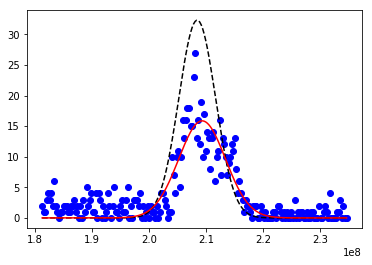

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 200
    # variables        = 3
    chi-square         = 1302.873
    reduced chi-square = 6.614
    Akaike info crit   = 380.802
    Bayesian info crit = 390.697
[[Variables]]
    sigma:       4.0957e+06 +/- 1.80e+05 (4.40%) (init= 3625488)
    center:      2.1144e+08 +/- 1.80e+05 (0.09%) (init= 2.102992e+08)
    amplitude:   1.6331e+08 +/- 6.22e+06 (3.81%) (init= 2.827881e+08)
    fwhm:        9.6447e+06 +/- 4.24e+05 (4.40%)  == '2.3548200*sigma'
    height:      15.9072492 +/- 0.605742 (3.81%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



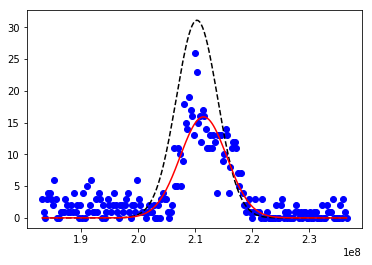

KeyboardInterrupt: 

In [5]:
# OPTIMIZE GAP TIME

m_values = np.linspace(0, 100, 50) # steps in 100 ns from 1ns to 10us

number_of_events = len(raw_data)
# number_of_events = 10000
assert number_of_events <= len(raw_data)
ndata = 4096

fwhm_values = []
m_values_ns = []

k = 100

baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
baseline_corrected_signals = raw_data[:number_of_events,] - baseline

for m in m_values:
    cs_nrgs=[]
    m = int(m)
    m_values_ns.append(m * 10)
    
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals , k, m, M)
        
    nbins = 2048
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048,range=[1e8,6.5e8]) #, range=Cs_range) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    fwhm, center = get_energy_resolution_cs_662(bins, cs_counts)
    fwhm_values.append(round(fwhm / center, 7) * 100)


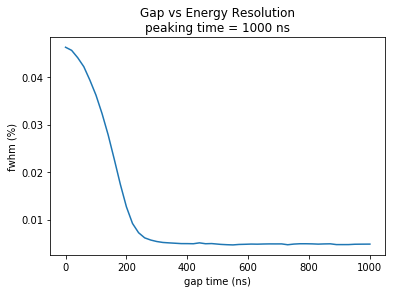

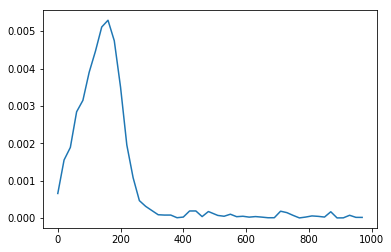

In [195]:
plt.plot(m_values_ns, fwhm_values, '-')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('gap_optimization.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

diff_list = abs(np.diff(fwhm_values))
plt.plot(m_values_ns[0:-1], diff_list, '-')
plt.show()

In [196]:
print(min(fwhm_values))
print(np.argmin(fwhm_values))
print(fwhm_values[np.argmin(fwhm_values)])
print(m_values_ns[np.argmin(fwhm_values)])

optimal_gap_time =  int(m_values_ns[np.argmin(fwhm_values)]) / 10
m = optimal_gap_time 
print(m)

0.0046636
27
0.0046636
550
55


In [6]:
m = 55

In [5]:
%run lab1_analysis_functions.py

In [ ]:
# OPTIMIZE PEAKING TIME

k_values = np.logspace(10, 1200, 10, endpoint=True, base=10) # steps in 100 ns from 1ns to 10us

Cs_range = [1e8,6.5e8]

number_of_events = len(raw_data)
ndata = 4096
number_of_events = 10000
assert number_of_events <= len(raw_data)

fwhm_values = []
k_values_ns = []

baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
baseline_corrected_signals = raw_data[:number_of_events,] - baseline

#M = find_M_value(baseline_corrected_signals[0:10])
#print('M ', M)

for k in k_values:
    cs_nrgs=[]
    k = int(k)
    #print(k)
    k_values_ns.append(k * 10)
    
    nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals, k, m, M)
        
    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048,range=[1.4e9, 1.9e9]) #, range=Cs_range) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    peak_fwhm, peak_center = fit_gaussian_with_plot(bins, counts)
    fwhm_values_peak.append(round(peak_fwhm / peak_center, 7) * 100)

    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[4.5e9, 5e9])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    pulser_fwhm, pulser_center =  fit_gaussian_with_plot(bins, counts)
    fwhm_values_pulser.append(round(pulser_fwhm / pulser_center, 7) * 100)


('M ', 5930.7413273323618)


In [ ]:
plt.loglog(k_values_ns, fwhm_values_peak, 'o')
plt.loglog(k_values_ns, fwhm_values_pulser, 's')
plt.xlabel('peaking time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('peak_optimization.png')
plt.title('Peaking Time vs Energy Resolution' + '\n'  + 'gap time = ' + str(m) +' ns')
plt.show()

#diff_list = (np.diff(fwhm_values_))
#plt.plot(k_values_ns[2:-1], diff_list[2:], '-')
#plt.show()

In [201]:
print(min(fwhm_values))
print(np.argmin(fwhm_values))
print(fwhm_values[np.argmin(fwhm_values)])
print(k_values_ns[np.argmin(fwhm_values)])

optimal_peaking_time = int(k_values_ns[np.argmin(fwhm_values)] / 10)
k = optimal_peaking_time
print(k)

0.0023972
71
0.0023972
7290
729


In [202]:
# Resolution Vs. Energy
print(' m = ', m * 10, ' ns')
print(' k = ', k * 10, ' ns')
print(' M = ', M / 10, ' ns')

(' m = ', 550, ' ns')
(' k = ', 7290, ' ns')
(' M = ', 593.07413273323618, ' ns')


In [6]:
filename = 'data/Am_pulser_real.h5'
am_raw_data = import_data(filename)

filename = 'data/Cs_pulser_real.h5'
cs_raw_data = import_data(filename)

filename = 'data/Co_pulser_real.h5'
co_raw_data = import_data(filename)

In [10]:
m = 55
k = 75
M = 4400

In [8]:
# GET ENERGY RESOLUTION FOR DIFFERENT PEAKS

def get_fwhm_cs(raw_data, k, m, M):
    number_of_events = len(raw_data)
    ndata = 4096
    fwhm_values = []

    baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
    baseline_corrected_signals = raw_data[:number_of_events,] - baseline
    
    nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals, k, m, M)
        
    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[1.4e9, 1.9e9])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    peak_fwhm, peak_center =  fit_gaussian_with_plot(bins, counts)

    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[4.5e9, 5e9])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    pulser_fwhm, pulser_center =  fit_gaussian_with_plot(bins, counts)
    
    return (round(peak_fwhm / peak_center, 7) * 100) , (round(pulser_fwhm / pulser_center, 7) * 100)

In [11]:
# GET ENERGY RESOLUTION FOR DIFFERENT PEAKS

def get_fwhm_co(raw_data, k, m, M):
    number_of_events = len(raw_data)
    ndata = 4096
    fwhm_values = []

    baseline = np.mean(raw_data[:number_of_events,0:99],1).reshape((number_of_events,1))
    baseline_corrected_signals = raw_data[:number_of_events,] - baseline
    
    nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, baseline_corrected_signals, k, m, M)
        
    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    peak_1_fwhm, peak_1_center =  fit_gaussian_with_plot(bins, counts)
    
    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    peak_2_fwhm, peak_2_center =  fit_gaussian_with_plot(bins, counts)

    nbins = 2048
    counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8])
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    
    plt.plot(bins, counts)
    plt.show()
    pulser_fwhm, pulser_center =  fit_gaussian_with_plot(bins, counts)
    
    return (round(peak_1_fwhm / peak_1_center, 7) * 100) , (round(peak_2_fwhm / peak_2_center, 7) * 100),  (round(pulser_fwhm / pulser_center, 7) * 100)

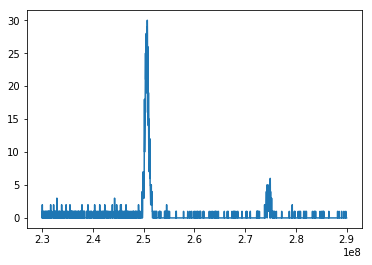

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 2048
    # variables        = 3
    chi-square         = 1294.903
    reduced chi-square = 0.633
    Akaike info crit   = -932.861
    Bayesian info crit = -915.987
[[Variables]]
    sigma:       3.8104e+05 +/- 3.61e+03 (0.95%) (init= 395507.8)
    center:      2.5062e+08 +/- 3.61e+03 (0.00%) (init= 2.505676e+08)
    amplitude:   2.3647e+07 +/- 1.94e+05 (0.82%) (init= 3.55957e+07)
    fwhm:        8.9728e+05 +/- 8.49e+03 (0.95%)  == '2.3548200*sigma'
    height:      24.7577758 +/- 0.202980 (0.82%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



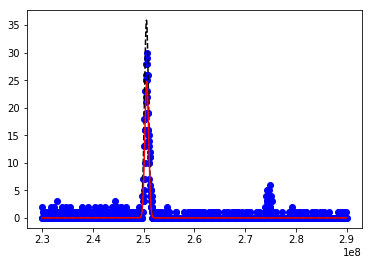

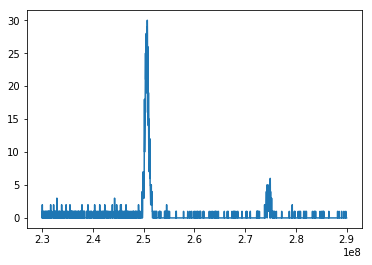

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 2048
    # variables        = 3
    chi-square         = 1294.903
    reduced chi-square = 0.633
    Akaike info crit   = -932.861
    Bayesian info crit = -915.987
[[Variables]]
    sigma:       3.8104e+05 +/- 3.61e+03 (0.95%) (init= 395507.8)
    center:      2.5062e+08 +/- 3.61e+03 (0.00%) (init= 2.505676e+08)
    amplitude:   2.3647e+07 +/- 1.94e+05 (0.82%) (init= 3.55957e+07)
    fwhm:        8.9728e+05 +/- 8.49e+03 (0.95%)  == '2.3548200*sigma'
    height:      24.7577758 +/- 0.202980 (0.82%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



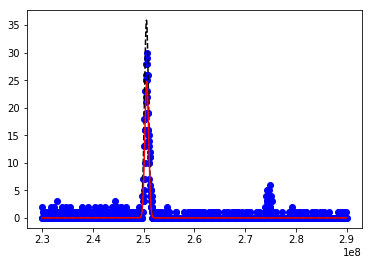

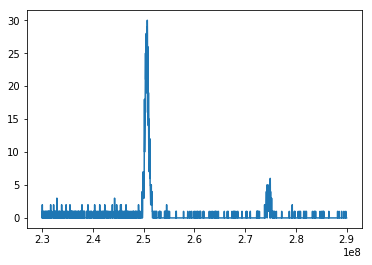

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 2048
    # variables        = 3
    chi-square         = 1294.903
    reduced chi-square = 0.633
    Akaike info crit   = -932.861
    Bayesian info crit = -915.987
[[Variables]]
    sigma:       3.8104e+05 +/- 3.61e+03 (0.95%) (init= 395507.8)
    center:      2.5062e+08 +/- 3.61e+03 (0.00%) (init= 2.505676e+08)
    amplitude:   2.3647e+07 +/- 1.94e+05 (0.82%) (init= 3.55957e+07)
    fwhm:        8.9728e+05 +/- 8.49e+03 (0.95%)  == '2.3548200*sigma'
    height:      24.7577758 +/- 0.202980 (0.82%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



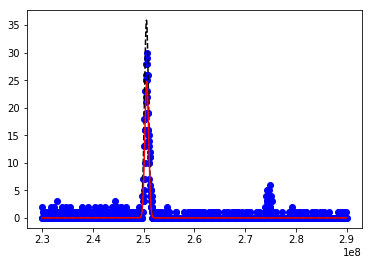

NameError: name 'energies' is not defined

In [12]:
co_1173_fwhm, co_1332_fwhm, co_pulser_fwhm = get_fwhm_co(co_raw_data, k, m, M)
energies.append(1173)
fwhm_values.append(co_1173_fwhm)
energies.append(1332)
fwhm_values.append(co_1332_fwhm)
fwhm_values_pulser.append(cs_pulser_fwhm)

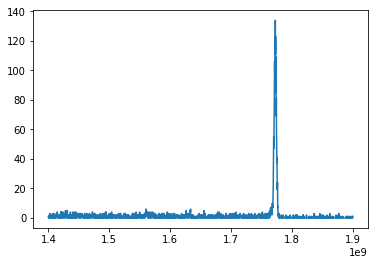

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 2048
    # variables        = 3
    chi-square         = 5908.512
    reduced chi-square = 2.889
    Akaike info crit   = 2175.918
    Bayesian info crit = 2192.792
[[Variables]]
    sigma:       1.8428e+06 +/- 1.04e+04 (0.56%) (init= 1831055)
    center:      1.7726e+09 +/- 1.04e+04 (0.00%) (init= 1.772559e+09)
    amplitude:   5.3870e+08 +/- 2.63e+06 (0.49%) (init= 7.36084e+08)
    fwhm:        4.3394e+06 +/- 2.45e+04 (0.56%)  == '2.3548200*sigma'
    height:      116.624403 +/- 0.569149 (0.49%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



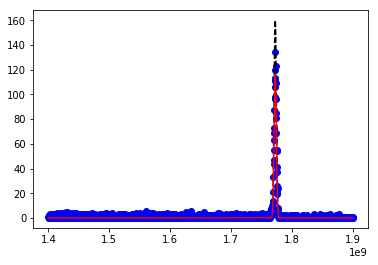

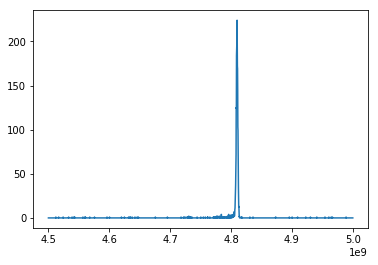

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 19
    # data points      = 2048
    # variables        = 3
    chi-square         = 2602.697
    reduced chi-square = 1.273
    Akaike info crit   = 496.873
    Bayesian info crit = 513.747
[[Variables]]
    sigma:       1.2117e+06 +/- 3.06e+03 (0.25%) (init= 1220703)
    center:      4.8098e+09 +/- 3.06e+03 (0.00%) (init= 4.809692e+09)
    amplitude:   6.4681e+08 +/- 1.41e+06 (0.22%) (init= 8.203125e+08)
    fwhm:        2.8533e+06 +/- 7.21e+03 (0.25%)  == '2.3548200*sigma'
    height:      212.956148 +/- 0.465858 (0.22%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.250)
    C(sigma, amplitude)          =  0.577 



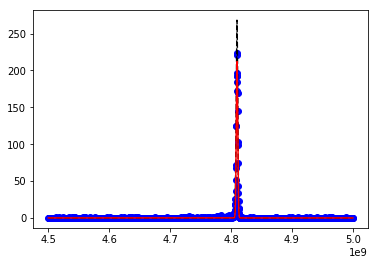

In [262]:
fwhm_values = []
energies = []

cs_662_fwhm, cs_pulser_fwhm = get_fwhm_cs(cs_raw_data, k, m, M)
cs_energy = 661.7

energies.append(cs_energy)
fwhm_values.append(cs_662_fwhm)
fwhm_values_pulser.append(cs_pulser_fwhm)

In [263]:
print(cs_662_fwhm)

0.24481


In [ ]:
plt.plot(energy_values, fwhm_values, 'o')
plt.xlabel('peaking time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('peak_optimization.png')
plt.title('Peaking Time vs Energy Resolution' + '\n'  + 'gap time = 550 ns')
plt.show()

diff_list = (np.diff(fwhm_values))
plt.plot(k_values_ns[2:-1], diff_list[2:], '-')
plt.show()

In [234]:
%run lab1_analysis_functions.py

0.0007758


In [ ]:
cs_fwhm = get_fwhm(cs_raw_data, k, m, M)
cs_energy = [661.7]

In [ ]:
# END HERE STOP 

In [ ]:
start = time.time()
sampling_time = 10.0
number_of_events = len(raw_data)
n_data = 4096
x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[0:number_of_events,0:799],1).reshape((number_of_events,1))
signals = raw_data[:number_of_events,] - baseline

end1 = time.time()
print(end1 - start)

start = time.time()
M = find_M_value(signals[0:10])
print('M : ', M)
end1 = time.time()
print(end1 - start)

start = time.time()
signal = signals[0,:]
plt.plot(signal)
plt.show()
end1 = time.time()
print('plot')
print(end1 - start)

start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [ ]:

if __name__ == "__main__":

    filename = './DATA_co60_2.h5'
    hf = tables.open_file(filename, "r")

    event_data = hf.root.EventData.read()
    raw_data = hf.root.RawData.read()
    hf.close()

    sampling_time = 10.0
    n_data = 4096
    x_values = np.linspace(0, n_data, n_data)
    print("XVAL" , len(x_values))

    k = 100 # peaking
    m = 100 # gap
    raw_signal = raw_data[2,:]
    print("RAW ", len(raw_signal))
    plt.plot(x_values, raw_signal)
    signal = baseline_correction(raw_signal)
    signal = trapezoidal_filter_2(signal, m, k)

    plt.figure(41)
    plt.cla()
    plt.clf()
    plt.plot(x_values, signal)
    plt.title('sample sig')
    plt.show()

    energy = get_energy_value(signal)
    print(energy)

    nrgs_2 = []
    number_of_events = len(raw_data)
    number_of_events = 1
    assert number_of_events < len(raw_data)
    k = 100 # peaking time
    l = 100 # gap

    for i in range(0, number_of_events, 1):
        gap = 100
        peak = 100
        signal = raw_data[i,:]
        signal = baseline_correction(signal)
        maxval = max(signal)
        signal = signal / maxval
        signal = trapezoidal_filter_2(signal, gap, peak)
        signal = signal / 424829.69
        print('gain = ', max(signal))
        nrg = get_energy_value(signal)
        #nrg = filter_and_get_energy(raw_data[i,:], gap, peak)
        nrgs_2.append(round(nrg, 7))



    plt.hist(nrgs_2, 500, log=True)
    plt.show()

In [ ]:
# filename = 'data/co60.h5'
start = time.time()
filename = 'data/DATA_co60_2.h5'
raw_data = import_data(filename)

end1 = time.time()
print('import')
print(end1 - start)

start = time.time()
sampling_time = 10.0
n_data = 4096
x_values = np.linspace(0, n_data, n_data)
#M = find_M_value(raw_data, 10)
M = 4400

end1 = time.time()
print('M')
print(end1 - start)

start = time.time()
print(M)
#M = 4400
raw_signal = raw_data[2,:]
signal = baseline_correction(raw_signal)

end1 = time.time()
print('baseline')
print(end1 - start)
start = time.time()

plt.plot(signal)
plt.show()

end1 = time.time()
print('plot')
print(end1 - start)
start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [ ]:
nrgs = []
number_of_events = len(raw_data)
assert number_of_events <= len(raw_data)

#M = find_M_value(raw_data, 10)
M = 4400
k = 100 # peaking time
l = 100 # gap

for i in range(0, number_of_events, 1):
    signal = raw_data[i,:]
    nrg = fast_trapezoidal_filter_energy(signal, l, k, M)
    nrgs.append(round(nrg, 7))

In [ ]:
nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[1.75e8, 2.9e8]) #range=[2.3e8, 2.9e8] WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()

nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8]) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()


In [ ]:
co_energies = calibrate_co_spectrum(nrgs)


In [ ]:
plt.plot(co_energies, counts)
plt.show()

In [ ]:
energy_values = []
fwhm_values = []

fwhm, center = get_energy_resolution_co_1332(co_energies, counts)
fwhm_values.append(fwhm)
energy_values.append(center)

plt.plot(energy_values, fwhm_values, 'o')
plt.show()